In [7]:
'''
@author Saul Figueroa
 _   _                 _               _ _   _               _   _  _   _ 
| | | |               | |             (_) | (_)             | \ | || \ | |
| |_| | __ _ _ __   __| |_      ___ __ _| |_ _ _ __   __ _  |  \| ||  \| |
|  _  |/ _` | '_ \ / _` \ \ /\ / / '__| | __| | '_ \ / _` | | . ` || . ` |
| | | | (_| | | | | (_| |\ V  V /| |  | | |_| | | | | (_| | | |\  || |\  |
\_| |_/\__,_|_| |_|\__,_| \_/\_/ |_|  |_|\__|_|_| |_|\__, | \_| \_/\_| \_/
                                                      __/ |               
                                                     |___/                

This is an app that shows how we can use a Neural Network to classify handwritten
digits using image recognition.
'''

# Install required libraries (run first time only)
# %pip install numpy
# %pip install opencv-python
# %pip install tensorflow
# %pip install matplotlib
;

''

In [8]:
# Preprocessing

# Import required libraries
import cv2 # Computer Vision (i.e. load images and process them)
import matplotlib.pyplot as plt # For digit's visualization
import tensorflow as tf # library for machine learning
import numpy as np # Numpy arrays
import os

# Download dataset
mnist = tf.keras.datasets.mnist

# Split into training and testing data
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

# Normalize (scaling pixel values between 0-1)
xTrain = tf.keras.utils.normalize(xTrain, axis = 1)
xTest = tf.keras.utils.normalize(xTest, axis = 1)

In [9]:
# Create model for Neural Network
'''
model = tf.keras.models.Sequential()

# Add layers to model
model.add(tf.keras.layers.Flatten(input_shape = (28, 28))) # 28x28 pixels

model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))

# All outputs from neurons add up to 1 due to softmax
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

# Compile model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
'''

"\nmodel = tf.keras.models.Sequential()\n\n# Add layers to model\nmodel.add(tf.keras.layers.Flatten(input_shape = (28, 28))) # 28x28 pixels\n\nmodel.add(tf.keras.layers.Dense(128, activation = 'relu'))\nmodel.add(tf.keras.layers.Dense(128, activation = 'relu'))\n\n# All outputs from neurons add up to 1 due to softmax\nmodel.add(tf.keras.layers.Dense(10, activation = 'softmax'))\n\n# Compile model\nmodel.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])\n"

In [10]:
'''
# Train the model

model.fit(xTrain, yTrain, epochs = 10) # Define 10 iterations

# Save the model
model.save('digits.model')
'''

"\n# Train the model\n\nmodel.fit(xTrain, yTrain, epochs = 10) # Define 10 iterations\n\n# Save the model\nmodel.save('digits.model')\n"

In [11]:
# Load previously trained model
model = tf.keras.models.load_model('digits.model')

# Evaluate the model
loss, accuracy = model.evaluate(xTest, yTest)

# Display Loss and Accuracy
print('The loss percentage (decimal) is: ' + str(loss)) # We want a low loss
print('The accuracy percentage (decimal) is: ' + str(accuracy)) # We want a high accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.1180 - accuracy: 0.9737
The loss percentage (decimal) is: 0.11803443729877472
The accuracy percentage (decimal) is: 0.9736999869346619


1/1 [==============================] - 0s 69ms/step
The digit in the image has been identified as: 3


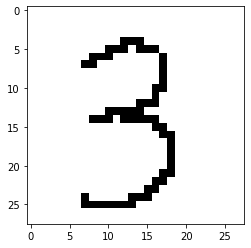

1/1 [==============================] - 0s 27ms/step
The digit in the image has been identified as: 5


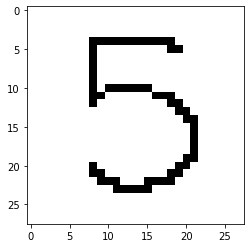

1/1 [==============================] - 0s 22ms/step
The digit in the image has been identified as: 4


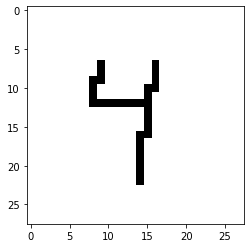

1/1 [==============================] - 0s 19ms/step
The digit in the image has been identified as: 8


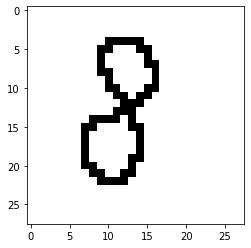

1/1 [==============================] - 0s 18ms/step
The digit in the image has been identified as: 1


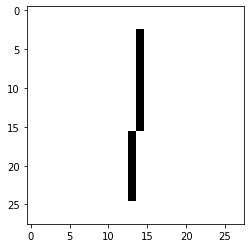

1/1 [==============================] - 0s 18ms/step
The digit in the image has been identified as: 6


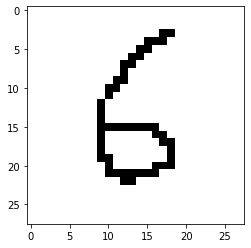

1/1 [==============================] - 0s 24ms/step
The digit in the image has been identified as: 9


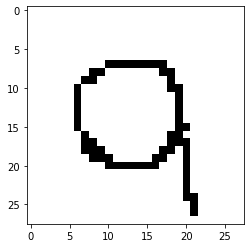

1/1 [==============================] - 0s 21ms/step
The digit in the image has been identified as: 2


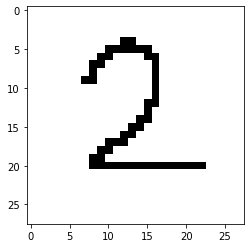

1/1 [==============================] - 0s 20ms/step
The digit in the image has been identified as: 7


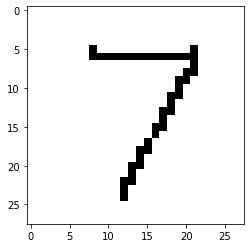

In [12]:
# Classifying sample images
i = 0 # Counter to iterate through images that will be classified.
while os.path.isfile(f"images/{i}.png"):
	try:
		image = cv2.imread(f"images/{i}.png")[:,:,0]
		image = np.invert(np.array([image]))
		prediction = model.predict(image)
		print(f"The digit in the image has been identified as: {np.argmax(prediction)}")
		# Show original image
		plt.imshow(image[0], cmap = plt.cm.binary)
		plt.show()
	except:
		print("There has been an error, please try again.")	
	finally:
		i += 1